# A Circle Puzzle

Here's a nice little math puzzle I encountered earlier this week: If you randomly place $n$ points on a circle independently and with a uniform distribution, what is the probability that the center of the circle is inside the convex hull of these $n$ points?

At first the puzzle may sound like a complicated exercise in evaluating multiple integrals, but there's a very simple solution to this puzzle:

Imagine picking a point on the circle being done in two steps: First pick a line going through the circle center from a uniform distribution of angles, and then with an equal probability pick one of the two points where this line intersects the circle. So picking the $n$ points is equivalent to first randomly picking the $n$ lines and then randomly picking one of the two intersection points with the circle for each line.

Now the condition that the center is within the convex hull of the $n$ points is equivalent to that all the chosen intersection points are located on the same half-circle, or in other words, that they are consecutive intersection points on the circle. After picking the $n$ lines, there $2^n$ ways of choosing the points. There are exactly $2n$ arrangements that do **not** have the circle inside the convex hull -- that is, the arrangements where we have picked one of the intersection points and the $n-1$ consecutive intersection points on the circle. Therefore the probability we are looking for is
$$
  P(\text{center within the convex hull}) = 1 - P(\text{center outside the convex hull})
  = 1 - \frac{2n}{2^n} = 1 - \frac{n}{2^{n-1}}.
$$

Now that we have solved the puzzle, let's write a small Monte Carlo simulation to numerically verify it.

## A Monte Carlo simulation

Setting up the notebook:

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

For simplicity, let's adopt a system where each point on the circle is specified by a real number on the half-open interval $[0,1[$. Then the condition that the center is inside the convex hull — loosely speaking, that all the points are "on the same side of the circle" — is equivalent to the condition that there is a gap of $0.5$ between two of the points.

In [2]:
def is_center_inside(points):
    """For the set of points on the interval [0,1[ representing the points on
    a circle, returns True if the center of the circle is within their convex
    hull."""
    sorted_points = sorted(points)
    gaps = [sorted_points[i + 1] - sorted_points[i] for i in range(len(points)-1)]
    # the gap between the first and the last point is an edge case:
    gaps.append(1 - sorted_points[-1] + sorted_points[0])
    return not any(gap >= 0.5 for gap in gaps)

The Monte Carlo routine itself is embarrassingly simple:

In [3]:
def simulate(n, times):
    """Return a list of `times` Boolean values stating whether a randomly selected
    set of `n` points on the circle has the circle center inside their convex
    hull.
    """
    return np.array([is_center_inside(np.random.random(n)) for _ in range(times)])

In [4]:
def cumulative_percentage_true(values):
    """Returns the cumulative percentage of True values in a Boolean Numpy array."""
    return np.cumsum(values.astype(int))/np.arange(1, len(values) + 1)

Now we can compare our simple simulation against the exact result:

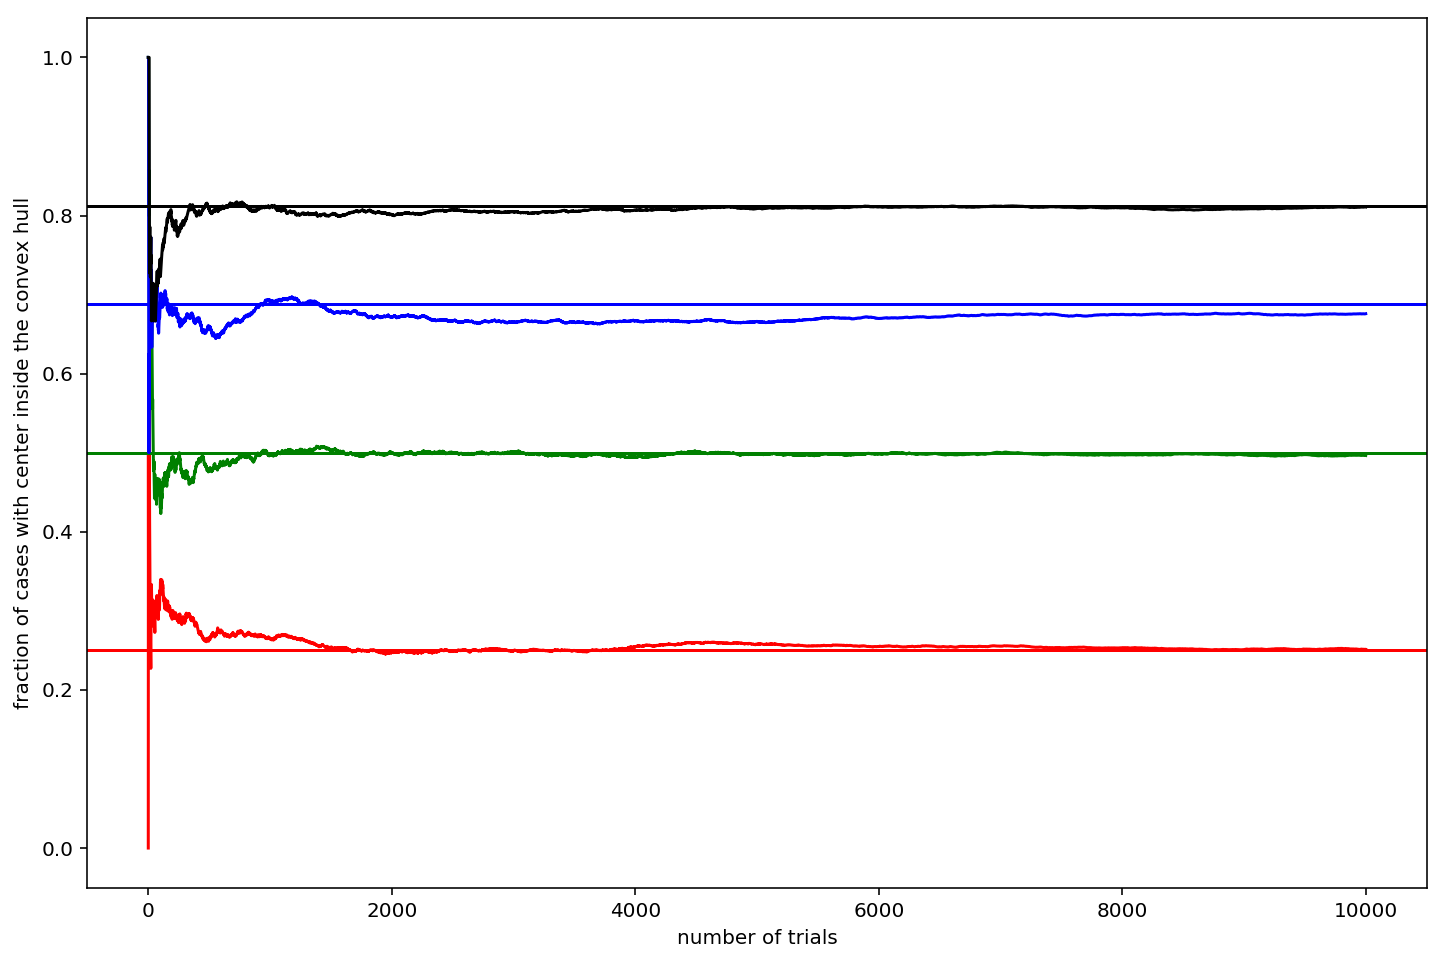

In [5]:
plt.xlabel("number of trials")
plt.ylabel("fraction of cases with center inside the convex hull")
for n, color in [(3, "r"), (4, "g"), (5, "b"), (6, "k")]:
    plt.axhline(1 - n/(2**(n-1)), color=color)
    plt.plot(cumulative_percentage_true(simulate(n, 10000)), color=color);

It looks like the numerical results are in agreement with our solution.